# Results

In [1]:
# import packages and set working directory
import numpy as np
import matplotlib.pyplot as plt
import os
from math import exp
import pandas as pd

# import objects
from farm import Climate
from farm import Soil
from farm import Crop
from farm import CropModel

In [2]:
climate = Climate() 
soil = Soil('loam')
crop = Crop(soil=soil)
soil.set_nZr(crop)  
model = CropModel(crop=crop,soil=soil,climate=climate)

model.run()
model.output()

done


,kc,LAI,stress,R,s,E,ET,T,L,dsdt
0,0.300000,0.750000,1.000000,2.277953,0.300000,0.099097,0.099097,0.000000,0.000000,2.178856
1,0.300000,0.750000,1.000000,18.941710,0.309662,0.123974,0.123974,0.000000,0.000000,18.817736
2,0.300000,0.750000,0.634277,6.069028,0.393111,0.403965,0.648266,0.244302,0.000000,5.420762
3,0.300000,0.750000,0.516775,0.000000,0.417150,0.502742,0.840097,0.337355,0.000000,-0.840097
4,0.300000,0.750000,0.534198,0.000000,0.413425,0.486966,0.809900,0.322934,0.000000,-0.809900
5,0.300000,0.750000,0.551268,0.000000,0.409833,0.471917,0.780949,0.309031,0.000000,-0.780949
6,0.300000,0.750000,0.567982,10.780203,0.406370,0.457556,0.753182,0.295625,0.000000,10.027022
7,0.300000,0.750000,0.372353,0.000000,0.450836,0.652752,1.120503,0.467751,0.000000,-1.120503
8,0.300000,0.750000,0.392172,0.000000,0.445867,0.629813,1.078329,0.448516,0.000000,-1.078329
9,0.300000,0.750000,0.411730,0.000000,0.441085,0.607996,1.038002,0.430005,0.000000,-1.038002


In [5]:
def daily_sm(simulations):
    
    # generate little progress bar
    import time
    import progressbar
    
    for i in progressbar.progressbar(range(simulations)):
        time.sleep(0.02)
    
    df = pd.DataFrame()
    result = []
    
    # run this many times
    for i in range(simulations):
        
        # initialize objects
        climate = Climate() 
        soil = Soil('loam')
        crop = Crop(soil=soil)
        soil.set_nZr(crop)  
        model = CropModel(crop=crop,soil=soil,climate=climate)
        model.run()

        # Return just the soil moisture in a dataframe
        df['x_' + str(i)] = model.s
        
        # Take average soil moisture across each day
        df['mean'] = df.mean(axis=1)
        df['var'] = df.var(axis=1)

    return df #result

fin = daily_sm(100)

100% (100 of 100) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


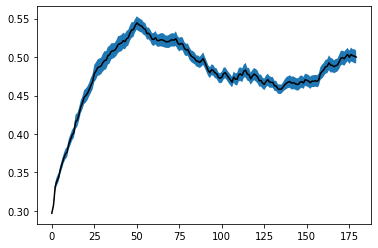

In [23]:
plt.plot(fin['mean'], 'k-')
x = np.arange(0.0, 180, 1)

plt.fill_between(x, fin['var']+fin['mean'], fin['mean']-fin['var'])
                 #v facecolor='red'
# I'm not sure that this is correct but it's somethingt

In [ ]:
def average_soil_moisture(simulations):
    
    # generate little progress bar
    import time
    import progressbar
    
    for i in progressbar.progressbar(range(simulations)):
        time.sleep(0.02)
    
    result = []
    
    # run this many times
    for i in range(simulations):
        
        # initialize objects
        climate = Climate() 
        soil = Soil('loam')
        crop = Crop(soil=soil)
        soil.set_nZr(crop)  
        model = CropModel(crop=crop,soil=soil,climate=climate)

        model.run()
        model.output()

        # Return average soil moisture
        x = model.s.mean()

        # Add this value to a list
        result.append(x)
        
    return result

# TODO: One enhancement
# Suppress done!

In [ ]:
fin = average_soil_moisture(simulations=1000)

In [ ]:
# This is the average and variance of soil moisture for the 10000s of simulations
import statistics
statistics.mean(fin)